<a href="https://colab.research.google.com/github/Yunshan-CAI/AI_supervision_thesis/blob/main/Classification_second.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **This is to train a simple nail biting classification model based on internet and "11k Hands" data with two categories.**

# Step1: dataloading and preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from fastai.vision.all import *
from pathlib import Path
path = Path('/content/drive/MyDrive/nail_data/classification_model_2')

In [ ]:
dls = ImageDataLoaders.from_folder(
    path,
    train='train',
    valid='valid',
    item_tfms=[Resize(192, method='squish')]
)

# Step2: Check the data

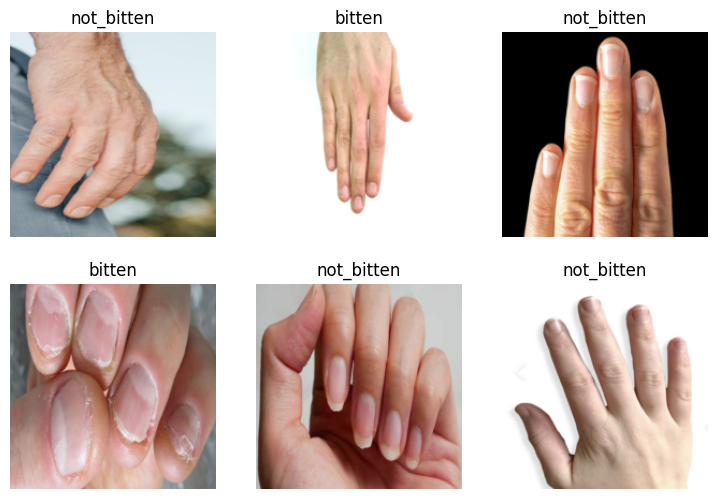

In [ ]:
dls.show_batch(max_n=6, nrows=2)

# Step3: Train the model

In [ ]:
learn = vision_learner(dls, resnet34, metrics=[Precision(),Recall(),accuracy,F1Score()])

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 83.3M/83.3M [00:00<00:00, 199MB/s]


In [ ]:
learn.fine_tune(10, base_lr=1e-3)

# Step4: Save the model

In [ ]:
learn.export('/content/drive/MyDrive/nail_data/trained_models/nail_bitten_classifier_2.pkl')

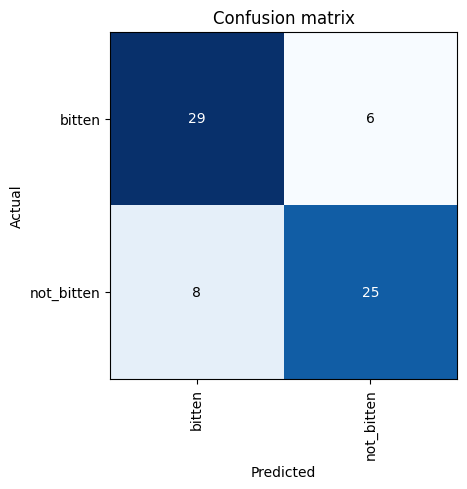

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

# Step 6: Experimenting with different presizing techniques

In [ ]:
#ÊîπËøõÁâàÊú¨1ÔºöÂü∫Á°Äpresizing
dls = ImageDataLoaders.from_folder(
    path,
    train='train',
    valid='valid',
    item_tfms=[Resize(460)],  # ÂÖàresizeÂà∞Â§ßÂ∞∫ÂØ∏ÔºåÈªòËÆ§crop
    batch_tfms=aug_transforms(size=192, min_scale=0.75)  # GPU‰∏äÊï∞ÊçÆÂ¢ûÂº∫+ÊúÄÁªàresize
)

In [ ]:
learn = vision_learner(dls, resnet34, metrics=[Precision(),Recall(),accuracy,F1Score()])

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 83.3M/83.3M [00:00<00:00, 208MB/s]


In [ ]:
learn.fine_tune(10, base_lr=1e-3)

In [ ]:
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    get_y=parent_label,  # ‰ªéÊñá‰ª∂Â§πÂêçËé∑ÂèñÊ†áÁ≠æ
    splitter=GrandparentSplitter(train_name='train', valid_name='valid'),
    item_tfms=Resize(460),
    batch_tfms=aug_transforms(
        size=192,
        min_scale=0.8,
        max_rotate=10,
        max_zoom=1.1,
        max_warp=0.1,
        flip_vert=False
    )
)

dls = dblock.dataloaders(path, bs=16)

In [ ]:
learn = vision_learner(dls, resnet34, metrics=[Precision(),Recall(),accuracy,F1Score()])

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 83.3M/83.3M [00:00<00:00, 201MB/s]


In [ ]:
learn.fine_tune(10, base_lr=1e-3)

# Step 7: Experimenting with different learning rate

In [ ]:
# 1. ÂàõÂª∫learnerÔºà‰ΩÜ‰∏çË¶ÅËÆ≠ÁªÉÔºâ
learn = vision_learner(dls, resnet34, metrics=[Precision(),Recall(),accuracy,F1Score()])

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 83.3M/83.3M [00:00<00:00, 210MB/s]


SuggestedLRs(valley=0.0005754399462603033)

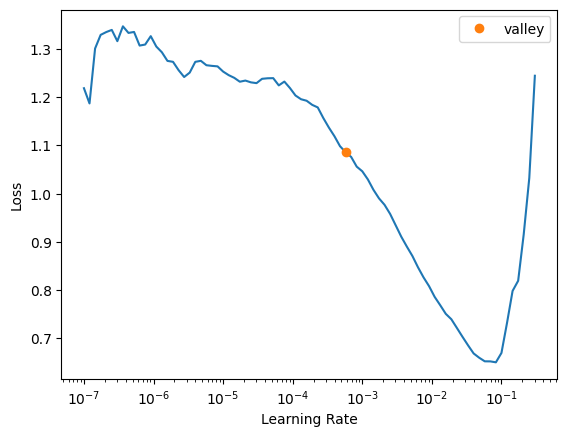

In [ ]:
# 2. ËøêË°ålr_find
learn.lr_find()

In [ ]:
#Valley PointÔºàFastAIÊé®ËçêÔºâ
learn.fine_tune(10, base_lr=5.75e-4)

In [ ]:
#Á®çÂæÆÊøÄËøõ‰∏ÄÁÇπ (ÊúÄÈô°‰∏ãÈôçÂå∫ÂüüÂ∑¶‰æß)
learn.fine_tune(10, base_lr=1e-4)

In [ ]:
learn.fine_tune(10, base_lr=2e-3)

In [ ]:
learn.fine_tune(10, base_lr=3e-3)

In [ ]:
learn.fine_tune(10, base_lr=5e-3)

In [ ]:
learn.fine_tune(10, base_lr=7e-3)

In [ ]:
learn.fine_tune(10, base_lr=7e-3)

# Step 8: Experimenting with different discriminative learning rates

In [ ]:
#Ê†áÂáÜDiscriminative LR
learn = vision_learner(dls, resnet34, metrics=[Precision(),Recall(),accuracy,F1Score()])

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 83.3M/83.3M [00:00<00:00, 377MB/s]


In [ ]:
# Á¨¨‰∏ÄÈò∂ÊÆµÔºöÂÜªÁªìÈ¢ÑËÆ≠ÁªÉÂ±ÇÔºåÂè™ËÆ≠ÁªÉÂàÜÁ±ªÂ§¥
learn.fit_one_cycle(3, 3e-3)

In [ ]:
# Á¨¨‰∫åÈò∂ÊÆµÔºöËß£ÂÜªÂπ∂‰ΩøÁî®discriminative learning rates
learn.unfreeze()
learn.fit_one_cycle(12, lr_max=slice(1e-6, 1e-4))

In [ ]:
# Êõ¥ÊøÄËøõÁöÑËåÉÂõ¥ÔºàÂü∫‰∫é‰Ω†ÁöÑlr_findÁªìÊûúÔºâ
learn.fit_one_cycle(3, 3e-3)

In [ ]:
learn.unfreeze()
# ‰ΩøÁî®Êõ¥Â§ßÁöÑÂ≠¶‰π†ÁéáËåÉÂõ¥
learn.fit_one_cycle(12, lr_max=slice(5e-5, 3e-3))

In [ ]:
#‰∏âÂ±Ç‰∏çÂêåÂ≠¶‰π†Áéá
learn.fit_one_cycle(3, 3e-3)

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(12, lr_max=slice(1e-6, 1e-5, 1e-4))

# Step 9: Experimenting with different architecture

In [ ]:
# resnet50
learn = vision_learner(dls, resnet50, metrics=[Precision(),Recall(),accuracy,F1Score()])

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 97.8M/97.8M [00:00<00:00, 212MB/s]


In [ ]:
learn.fine_tune(10, base_lr=1e-3)

In [ ]:
# EfficientNet-B0 - ÊïàÁéáÂæàÈ´òÁöÑÁé∞‰ª£Êû∂ÊûÑ
learn = vision_learner(dls, efficientnet_b0, metrics=[Precision(),Recall(),accuracy,F1Score()])

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 20.5M/20.5M [00:00<00:00, 129MB/s] 


In [ ]:
learn.fine_tune(10, base_lr=1e-3)

# Step 10: See model performance with best presizing, learning rate and architecture

In [ ]:
dls = ImageDataLoaders.from_folder(
    path,
    train='train',
    valid='valid',
    item_tfms=[Resize(460)],  # ÂÖàresizeÂà∞Â§ßÂ∞∫ÂØ∏ÔºåÈªòËÆ§crop
    batch_tfms=aug_transforms(size=192, min_scale=0.75)  # GPU‰∏äÊï∞ÊçÆÂ¢ûÂº∫+ÊúÄÁªàresize
)

In [ ]:
learn = vision_learner(dls, efficientnet_b0, metrics=[Precision(),Recall(),accuracy,F1Score()])

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 20.5M/20.5M [00:00<00:00, 119MB/s] 


In [ ]:
learn.fine_tune(15, base_lr=3e-3)

In [ ]:
learn = vision_learner(dls, resnet34, metrics=[Precision(),Recall(),accuracy,F1Score()])

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 83.3M/83.3M [00:00<00:00, 179MB/s]


In [ ]:
learn.fine_tune(15, base_lr=3e-3)

In [ ]:
learn = vision_learner(dls, efficientnet_b0, metrics=[Precision(),Recall(),accuracy,F1Score()])

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 20.5M/20.5M [00:00<00:00, 177MB/s]


In [ ]:
learn.fine_tune(15, base_lr=7e-3)

# Step 11: Experimenting with progressive resizing

In [ ]:
# ÂàõÂª∫Ëé∑ÂèñDataLoadersÁöÑÂáΩÊï∞
def get_dls(size, bs=16):
    return ImageDataLoaders.from_folder(
        path,
        train='train',
        valid='valid',
        item_tfms=[Resize(size, method='squish')],
        bs=bs
    )

In [ ]:
# Stage 1: Â∞èÂ∞∫ÂØ∏Âø´ÈÄüËÆ≠ÁªÉ
print("Stage 1: Â∞èÂ∞∫ÂØ∏ËÆ≠ÁªÉ (128x128)")
dls = get_dls(128, bs=32)  # Â∞èÂõæÂÉèÂèØ‰ª•Áî®Êõ¥Â§ßÁöÑbatch size
learn = vision_learner(dls, resnet34, metrics=[Precision(),Recall(),accuracy,F1Score()])
learn.fit_one_cycle(4, 3e-3)  # Áî®‰Ω†ÊâæÂà∞ÁöÑÊúÄ‰Ω≥Â≠¶‰π†Áéá

Stage 1: Â∞èÂ∞∫ÂØ∏ËÆ≠ÁªÉ (128x128)


Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 83.3M/83.3M [00:00<00:00, 232MB/s]


In [ ]:
# Stage 2: Â§ßÂ∞∫ÂØ∏Á≤æÁªÜËÆ≠ÁªÉ
print("Stage 2: Â§ßÂ∞∫ÂØ∏ËÆ≠ÁªÉ (224x224)")
learn.dls = get_dls(224, bs=16)  # Â§ßÂõæÂÉèÁî®Â∞è‰∏ÄÁÇπÁöÑbatch size
learn.fine_tune(6, 1e-3)  # Êõ¥‰ΩéÁöÑÂ≠¶‰π†ÁéáÁ≤æÁªÜË∞ÉÊï¥

Stage 2: Â§ßÂ∞∫ÂØ∏ËÆ≠ÁªÉ (224x224)


In [ ]:
# ‰ΩøÁî®‰Ω†ÂèëÁé∞ÁöÑÊúÄ‰Ω≥ÂèÇÊï∞ÁªÑÂêà
def get_dls_optimized(size, bs=16):
    return ImageDataLoaders.from_folder(
        path,
        train='train',
        valid='valid',
        item_tfms=[Resize(460 if size > 192 else size)],  # Â§ßÂ∞∫ÂØ∏Áî®presizing
        batch_tfms=aug_transforms(size=size, min_scale=0.75) if size > 192 else None,
        bs=bs
    )

In [ ]:
# Stage 1: Â∞èÂ∞∫ÂØ∏ + ‰Ω†ÁöÑÊúÄ‰Ω≥Â≠¶‰π†Áéá
print("Stage 1: Â∞èÂ∞∫ÂØ∏ËÆ≠ÁªÉ (128x128)")
dls = get_dls_optimized(128, bs=32)
learn = vision_learner(dls, resnet34, metrics=[Precision(),Recall(),accuracy,F1Score()])
learn.fit_one_cycle(4, 3e-3)  # ‰Ω†ÁöÑÊúÄ‰Ω≥Â≠¶‰π†Áéá

Stage 1: Â∞èÂ∞∫ÂØ∏ËÆ≠ÁªÉ (128x128)


Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 83.3M/83.3M [00:00<00:00, 224MB/s]


In [ ]:
# Stage 2: Â§ßÂ∞∫ÂØ∏ + ÊúÄ‰Ω≥presizing + ÊúÄ‰Ω≥Â≠¶‰π†Áéá
print("Stage 2: Â§ßÂ∞∫ÂØ∏ËÆ≠ÁªÉ (192x192)")
learn.dls = get_dls_optimized(192, bs=16)
learn.fine_tune(6, 3e-3)  # ÁªßÁª≠Áî®‰Ω†ÁöÑÊúÄ‰Ω≥Â≠¶‰π†Áéá

Stage 2: Â§ßÂ∞∫ÂØ∏ËÆ≠ÁªÉ (192x192)


In [ ]:
# ÂàõÂª∫Ëé∑ÂèñDataLoadersÁöÑÂáΩÊï∞
def get_dls(size, bs=16):
    return ImageDataLoaders.from_folder(
        path,
        train='train',
        valid='valid',
        item_tfms=[Resize(size, method='squish')],
        bs=bs
    )

In [ ]:
# ÂõõÈò∂ÊÆµÊ∏êËøõÂºèËÆ≠ÁªÉÂèÇÊï∞
stages = [
    (96, 32, 3, 3e-3),   # (size, batch_size, epochs, lr)
    (128, 24, 4, 3e-3),
    (192, 16, 4, 2e-3),
    (224, 16, 6, 1e-3)   # ÊúÄÂêéÁî®Êõ¥‰ΩéÂ≠¶‰π†ÁéáÁ≤æÁªÜË∞ÉÊï¥
]

print("üöÄ ÂºÄÂßãÂõõÈò∂ÊÆµProgressive ResizingËÆ≠ÁªÉ")
print("="*60)

üöÄ ÂºÄÂßãÂõõÈò∂ÊÆµProgressive ResizingËÆ≠ÁªÉ


In [ ]:
import gc

learn = None
for i, (size, bs, epochs, lr) in enumerate(stages):
    print(f"\nüìç Stage {i+1}/4: {size}x{size}, batch_size={bs}, epochs={epochs}, lr={lr}")
    print("-" * 40)

    if learn is None:
        # Á¨¨‰∏ÄÈò∂ÊÆµÔºöÂàõÂª∫Êñ∞ÁöÑlearner
        print("‚ú® ÂàõÂª∫Êñ∞ÁöÑlearner...")
        dls = get_dls(size, bs)
        learn = vision_learner(dls, resnet34, metrics=[Precision(),Recall(),accuracy,F1Score()])
        print(f"üéØ ÂºÄÂßãStage {i+1}ËÆ≠ÁªÉ...")
        learn.fit_one_cycle(epochs, lr)
    else:
        # ÂêéÁª≠Èò∂ÊÆµÔºöÊõøÊç¢DataLoadersÂπ∂ÁªßÁª≠ËÆ≠ÁªÉ
        print("üîÑ Êõ¥Êñ∞DataLoaders...")

        # Ê∏ÖÁêÜGPUÂÜÖÂ≠ò
        torch.cuda.empty_cache()
        gc.collect()

        # Êõ¥Êñ∞DataLoaders
        learn.dls = get_dls(size, bs)

        print(f"üéØ ÂºÄÂßãStage {i+1}ËÆ≠ÁªÉ...")
        learn.fit_one_cycle(epochs, lr)

    # ÊòæÁ§∫ÂΩìÂâçÈò∂ÊÆµÁªìÊûú
    print(f"‚úÖ Stage {i+1} ÂÆåÊàê!")


üìç Stage 1/4: 96x96, batch_size=32, epochs=3, lr=0.003
----------------------------------------
‚ú® ÂàõÂª∫Êñ∞ÁöÑlearner...
üéØ ÂºÄÂßãStage 1ËÆ≠ÁªÉ...


‚úÖ Stage 1 ÂÆåÊàê!

üìç Stage 2/4: 128x128, batch_size=24, epochs=4, lr=0.003
----------------------------------------
üîÑ Êõ¥Êñ∞DataLoaders...
üéØ ÂºÄÂßãStage 2ËÆ≠ÁªÉ...


‚úÖ Stage 2 ÂÆåÊàê!

üìç Stage 3/4: 192x192, batch_size=16, epochs=4, lr=0.002
----------------------------------------
üîÑ Êõ¥Êñ∞DataLoaders...
üéØ ÂºÄÂßãStage 3ËÆ≠ÁªÉ...


‚úÖ Stage 3 ÂÆåÊàê!

üìç Stage 4/4: 224x224, batch_size=16, epochs=6, lr=0.001
----------------------------------------
üîÑ Êõ¥Êñ∞DataLoaders...
üéØ ÂºÄÂßãStage 4ËÆ≠ÁªÉ...


‚úÖ Stage 4 ÂÆåÊàê!


In [ ]:
print("\n" + "="*60)
print("üèÜ ÂõõÈò∂ÊÆµProgressive ResizingËÆ≠ÁªÉÂÆåÊàê!")
print("="*60)

# ÊòæÁ§∫ÊúÄÁªàÁªìÊûúÔºàÂèØÈÄâÔºâ
print("\nüìä ÊúÄÁªàÈ™åËØÅÁªìÊûú:")
learn.validate()


üèÜ ÂõõÈò∂ÊÆµProgressive ResizingËÆ≠ÁªÉÂÆåÊàê!

üìä ÊúÄÁªàÈ™åËØÅÁªìÊûú:


(#5) [0.6706728935241699,0.78125,0.7575757575757576,0.779411792755127,0.7692307692307693]

# Step 12: Experimenting with test time agumentation

In [ ]:
learn.fine_tune(10, base_lr=1e-3)

In [ ]:
print("\nüîç ÂºÄÂßãTTAÊµãËØï...")

# ÊôÆÈÄöÈ™åËØÅÁªìÊûú
normal_results = learn.validate()
normal_acc = float(normal_results[2])
normal_precision = float(normal_results[0])
normal_recall = float(normal_results[1])
normal_f1 = float(normal_results[3])

# TTAÂ¢ûÂº∫È¢ÑÊµã
preds_tta, targs = learn.tta()
tta_acc = accuracy(preds_tta, targs).item()

# ËÆ°ÁÆóTTAÁöÑÂÖ∂‰ªñÊåáÊ†á
preds_class = preds_tta.argmax(dim=1)
from sklearn.metrics import precision_score, recall_score, f1_score
tta_precision = precision_score(targs, preds_class, average='weighted')
tta_recall = recall_score(targs, preds_class, average='weighted')
tta_f1 = f1_score(targs, preds_class, average='weighted')

# ÁªìÊûúÂØπÊØî
print(f"\nüìä ÁªìÊûúÂØπÊØî:")
print(f"ÊôÆÈÄöÈ™åËØÅ - ÂáÜÁ°ÆÁéá: {normal_acc*100:.2f}%, F1: {normal_f1*100:.2f}%")
print(f"TTAÂ¢ûÂº∫ - ÂáÜÁ°ÆÁéá: {tta_acc*100:.2f}%, F1: {tta_f1*100:.2f}%")
print(f"üöÄ TTAÊèêÂçá: ÂáÜÁ°ÆÁéá {(tta_acc-normal_acc)*100:+.2f}%, F1 {(tta_f1-normal_f1)*100:+.2f}%")



üîç ÂºÄÂßãTTAÊµãËØï...



üìä ÁªìÊûúÂØπÊØî:
ÊôÆÈÄöÈ™åËØÅ - ÂáÜÁ°ÆÁéá: 78.79%, F1: 83.82%
TTAÂ¢ûÂº∫ - ÂáÜÁ°ÆÁéá: 83.82%, F1: 83.77%
üöÄ TTAÊèêÂçá: ÂáÜÁ°ÆÁéá +5.04%, F1 -0.05%


# Step 13: Experimenting with label smoothing

In [ ]:
import timm
model = timm.create_model('resnet34', pretrained=True, num_classes=dls.c)
learn = Learner(dls, model,
                loss_func=LabelSmoothingCrossEntropy(),
                metrics=[Precision(),Recall(),accuracy,F1Score()])

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/87.3M [00:00<?, ?B/s]

In [ ]:
learn.fine_tune(10, base_lr=1e-3)

# Step 14: Optimize weight_decay parameters

In [ ]:
# ÂÆûÈ™å‰∏çÂêåÁöÑweight_decayÂÄº
weight_decays = [0.01, 0.1, 0.3]  # ÈªòËÆ§ÊòØ0.01

results = []
for wd in weight_decays:
    print(f"\nüß™ ÊµãËØïWeight Decay = {wd}")

    learn = vision_learner(dls, resnet34, metrics=[Precision(),Recall(),accuracy,F1Score()])
    learn.fine_tune(10, base_lr=1e-3, wd=wd)

    # ËÆ∞ÂΩïÁªìÊûú
    val_results = learn.validate()
    accuracy_score = float(val_results[2]) * 100
    f1_score = float(val_results[3]) * 100

    results.append({
        'weight_decay': wd,
        'accuracy': accuracy_score,
        'f1': f1_score
    })

    print(f"ÂáÜÁ°ÆÁéá: {accuracy_score:.2f}%, F1: {f1_score:.2f}%")

# ÁªìÊûúÂØπÊØî
print(f"\nüìä Weight DecayÂØπÊØîÁªìÊûú:")
for result in results:
    print(f"WD={result['weight_decay']}: Acc={result['accuracy']:.2f}%, F1={result['f1']:.2f}%")


üß™ ÊµãËØïWeight Decay = 0.01


Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 83.3M/83.3M [00:00<00:00, 451MB/s]


ÂáÜÁ°ÆÁéá: 84.85%, F1: 89.71%

üß™ ÊµãËØïWeight Decay = 0.1


ÂáÜÁ°ÆÁéá: 81.82%, F1: 77.94%

üß™ ÊµãËØïWeight Decay = 0.3


ÂáÜÁ°ÆÁéá: 75.76%, F1: 83.82%

üìä Weight DecayÂØπÊØîÁªìÊûú:
WD=0.01: Acc=84.85%, F1=89.71%
WD=0.1: Acc=81.82%, F1=77.94%
WD=0.3: Acc=75.76%, F1=83.82%


# Save a good performance model and test (progressive resizing)--not good enough

In [ ]:
# ÂàõÂª∫Ëé∑ÂèñDataLoadersÁöÑÂáΩÊï∞
def get_dls(size, bs=16):
    return ImageDataLoaders.from_folder(
        path,
        train='train',
        valid='valid',
        item_tfms=[Resize(size, method='squish')],
        bs=bs
    )

In [ ]:
# Stage 1: Â∞èÂ∞∫ÂØ∏Âø´ÈÄüËÆ≠ÁªÉ
print("Stage 1: Â∞èÂ∞∫ÂØ∏ËÆ≠ÁªÉ (128x128)")
dls = get_dls(128, bs=32)  # Â∞èÂõæÂÉèÂèØ‰ª•Áî®Êõ¥Â§ßÁöÑbatch size
learn = vision_learner(dls, resnet34, metrics=[Precision(),Recall(),accuracy,F1Score()])
learn.fit_one_cycle(4, 3e-3)  # Áî®‰Ω†ÊâæÂà∞ÁöÑÊúÄ‰Ω≥Â≠¶‰π†Áéá

Stage 1: Â∞èÂ∞∫ÂØ∏ËÆ≠ÁªÉ (128x128)


Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 83.3M/83.3M [00:00<00:00, 189MB/s]


In [ ]:
# Stage 2: Â§ßÂ∞∫ÂØ∏Á≤æÁªÜËÆ≠ÁªÉ
print("Stage 2: Â§ßÂ∞∫ÂØ∏ËÆ≠ÁªÉ (224x224)")
learn.dls = get_dls(224, bs=16)  # Â§ßÂõæÂÉèÁî®Â∞è‰∏ÄÁÇπÁöÑbatch size
learn.fine_tune(6, 1e-3)  # Êõ¥‰ΩéÁöÑÂ≠¶‰π†ÁéáÁ≤æÁªÜË∞ÉÊï¥

Stage 2: Â§ßÂ∞∫ÂØ∏ËÆ≠ÁªÉ (224x224)


In [ ]:
learn.export('/content/drive/MyDrive/nail_data/trained_models/nail_bitten_classifier_2_good_performance.pkl')

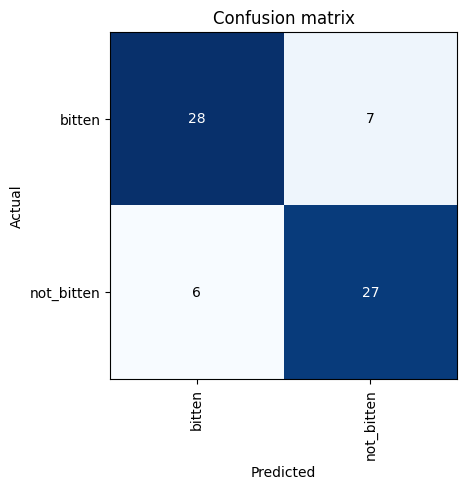

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

#Test the model

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont
import numpy as np

In [ ]:
model_path = '/content/drive/MyDrive/nail_data/trained_models/nail_bitten_classifier_2.pkl'
learn = load_learner(model_path)

In [ ]:
img_path = '/content/drive/MyDrive/nail_data/test_data/huien.JPG'
img = PILImage.create(img_path)

In [ ]:
pred_class, pred_idx, probs = learn.predict(img)

In [ ]:
confidence = probs[pred_idx].item() * 100

In [ ]:
title = f"Prediction result: {pred_class} (Confidence coefficient: {confidence:.1f}%)"
print(title)

Prediction result: not_bitten (Confidence coefficient: 98.8%)
